 #

# Ma422 Project - Adult income dataset

Objective : The objective is to predict, according to some characteristics, if a person earns more than $50K per year or not


We import the librairies we need to read the datas and analyse it.

In [92]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

We open and read the datas file.

In [93]:
df = pd.read_csv('src/datas/adult.csv', header=0)
df = df.sample(frac=0.2)  # Working with 20% of the dataset to avoid long time program run
#df_copy = df.copy()
print(df)

       age         workclass  fnlwgt     education  educational-num  \
38282   22           Private  175431       HS-grad                9   
34828   36           Private  199501  Some-college               10   
21509   27                 ?  330132       HS-grad                9   
26680   46           Private  182533     Bachelors               13   
3620    17  Self-emp-not-inc  226203          12th                8   
...    ...               ...     ...           ...              ...   
47489   31           Private   73585     Assoc-voc               11   
11777   43      Self-emp-inc  375807     Bachelors               13   
43565   27           Private   80165  Some-college               10   
15260   27           Private  181291       HS-grad                9   
45468   31           Private  178370       HS-grad                9   

           marital-status       occupation   relationship                race  \
38282  Married-civ-spouse    Other-service        Husband         

## 1 - Quick dataset analysis

Now that the dataset is imported in the jupyter file, we can start exploring, digging in the datas to see what it is composed of, understand the variables in it, the possible links between them, find the target etc. This step is very important because it allows the user to understand the meaning of datasets, see if information has to be changed, or removed and also start thinking about how datas should be used with the future implemented model.

A) Dataset cleaning and verifications



First, we check if there are repetitions of observations in the dataset. If yes, we erase them with the method `drop_duplicates` from `pandas` library.

In [94]:
df = df.drop_duplicates()
print(df)

       age         workclass  fnlwgt     education  educational-num  \
38282   22           Private  175431       HS-grad                9   
34828   36           Private  199501  Some-college               10   
21509   27                 ?  330132       HS-grad                9   
26680   46           Private  182533     Bachelors               13   
3620    17  Self-emp-not-inc  226203          12th                8   
...    ...               ...     ...           ...              ...   
47489   31           Private   73585     Assoc-voc               11   
11777   43      Self-emp-inc  375807     Bachelors               13   
43565   27           Private   80165  Some-college               10   
15260   27           Private  181291       HS-grad                9   
45468   31           Private  178370       HS-grad                9   

           marital-status       occupation   relationship                race  \
38282  Married-civ-spouse    Other-service        Husband         

In [95]:
# Remplace "?" by NaN
df.replace(' ?', np.nan, inplace=True)

Then, we remove them in order to have valid datas to send to the model.
We will use the method `isna` from `pandas` library to list the missing values.

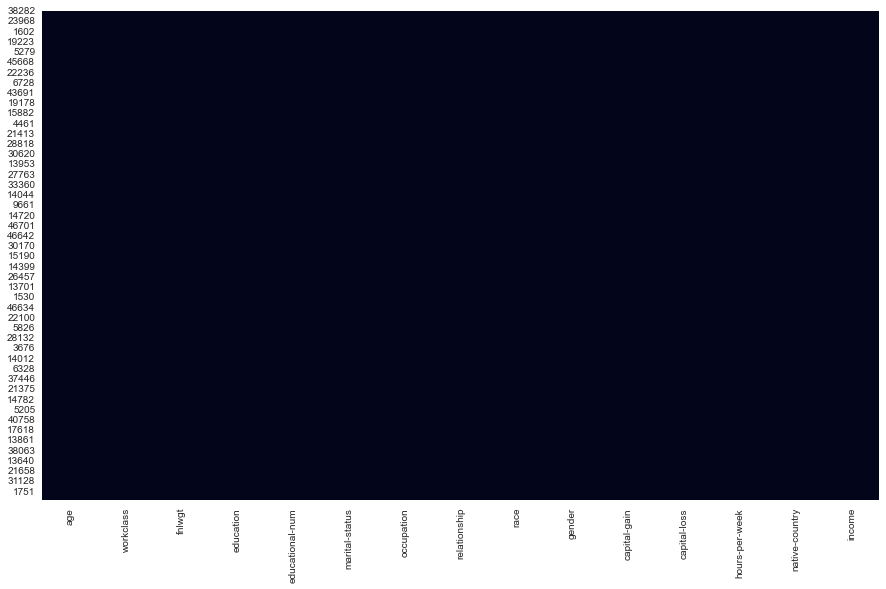

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


In [96]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues) # Normalized values between O and 1

B) Analysis the dataset

In [97]:
columnNames = df.columns
datasetShape = df.shape
variablesTypes = df.dtypes
variablesTypesCount = df.dtypes.value_counts()

print('Column names :', columnNames, '\n')
print('Dataset Shape :', datasetShape, '\n')
print('Variables Types :', variablesTypes, '\n')
print('Variables Types Count :', variablesTypesCount)

Column names : Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Dataset Shape : (9766, 15) 

Variables Types : age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object 

Variables Types Count : object    9
int64     6
dtype: int64


**Correlation matix**

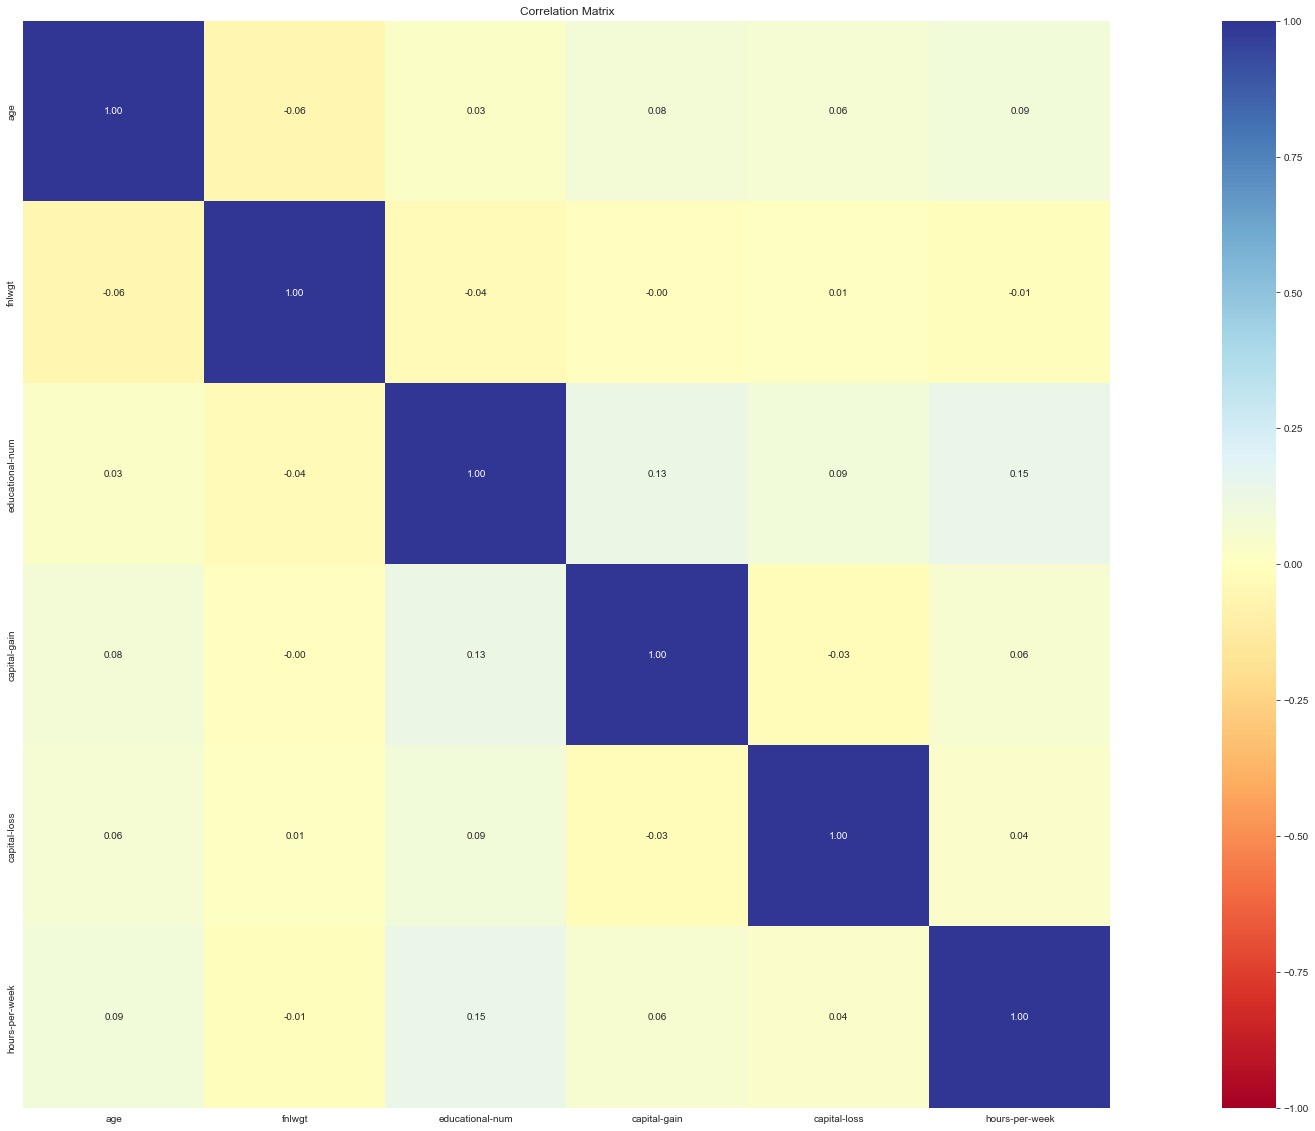

In [98]:
# Compute the correlation matrix
corr_mat = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(40, 20))

# Create the heatmap
sns.heatmap(corr_mat, cmap='RdYlBu', annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, ax=ax)

# Set the title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

Dropping the useless features.

In [99]:
df = df.drop(['age', 'educational-num', 'marital-status', 'hours-per-week', 'race', 'fnlwgt'], axis=1)
print(df)

              workclass     education       occupation   relationship  gender  \
38282           Private       HS-grad    Other-service        Husband    Male   
34828           Private  Some-college  Exec-managerial      Unmarried  Female   
21509                 ?       HS-grad                ?  Not-in-family  Female   
26680           Private     Bachelors     Adm-clerical      Unmarried  Female   
3620   Self-emp-not-inc          12th            Sales      Own-child    Male   
...                 ...           ...              ...            ...     ...   
47489           Private     Assoc-voc   Prof-specialty        Husband    Male   
11777      Self-emp-inc     Bachelors            Sales        Husband    Male   
43565           Private  Some-college     Adm-clerical      Unmarried  Female   
15260           Private       HS-grad     Adm-clerical      Own-child  Female   
45468           Private       HS-grad    Other-service      Unmarried  Female   

       capital-gain  capita

C) Analysis of the target variable

Repartition of the target :
 <=50K    7402
>50K     2364
Name: income, dtype: int64

Type of this variable: object


<AxesSubplot:ylabel='income'>

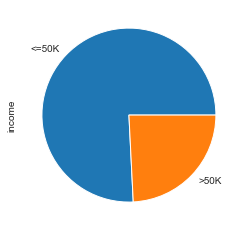

In [100]:
count_target = df['income'].value_counts()
target_type = df['income'].dtype

print('Repartition of the target :\n', count_target)
print('\nType of this variable:', target_type)
count_target.plot.pie()

## 2 - Pre-processing

In [101]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Pre-processing of the variables

In [102]:
print(df.columns.tolist())
encoder = preprocessing.LabelEncoder()
features = ['workclass', 'education', 'occupation', 'relationship', 'gender', 'native-country', 'income']
df[features] = df[features].apply(encoder.fit_transform)
print(df)

['workclass', 'education', 'occupation', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'native-country', 'income']
       workclass  education  occupation  relationship  gender  capital-gain  \
38282          4         11           8             0       1             0   
34828          4         15           4             4       0             0   
21509          0         11           0             1       0             0   
26680          4          9           1             4       0             0   
3620           6          2          12             3       1             0   
...          ...        ...         ...           ...     ...           ...   
47489          4          8          10             0       1             0   
11777          5          9          12             0       1             0   
43565          4         15           1             4       0             0   
15260          4         11           1             3       0             0   
4546

We can finally build the matrices X and y.

In [103]:
X = df.drop(['income'], axis=1)
y = df['income']

print(X)
print(y)

# Samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
print(X_train.shape)
print(X_test.shape)

       workclass  education  occupation  relationship  gender  capital-gain  \
38282          4         11           8             0       1             0   
34828          4         15           4             4       0             0   
21509          0         11           0             1       0             0   
26680          4          9           1             4       0             0   
3620           6          2          12             3       1             0   
...          ...        ...         ...           ...     ...           ...   
47489          4          8          10             0       1             0   
11777          5          9          12             0       1             0   
43565          4         15           1             4       0             0   
15260          4         11           1             3       0             0   
45468          4         11           8             4       0             0   

       capital-loss  native-country  
38282        

## 3 - Ensemble learning methods

#### A) Bagging method

In [104]:
from collections import Counter
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

We can try several methods and compare their performances.


Bagging method from scratch.

In [105]:
def BaggingScratch(X_train, y_train, X_test, base_estimator, n_estimators=10):
    y_pred = np.zeros((X_test.shape[0], n_estimators))  # Initialization of the array which will store all the predictions for n estimators

    for i in range(n_estimators):
        num = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)  # Resample with replacement
        X_bstr = X_train.loc[num]  # Access to the row which has index num
        y_bstr = y_train.loc[num]  # Access to the column which has index num
        base_estimator.fit(X_bstr, y_bstr)  # Fitting with a base_estimator
        y_pred[:, i] = base_estimator.predict(X_test)  # Writing the predictions results in y_pred array

    # Aggregate the predictions using majority voting
    y_pred_majority = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        y_pred_i = y_pred[i, :]
        c = Counter(y_pred_i)  # Read all the values in y_pred_i
        y_pred_majority[i] = c.most_common(1)[0][0]  # Getting the most common element and its count (passing 1 as argument and [0][0] to get the most common element)

    return y_pred_majority

knn = KNeighborsClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
y_pred_knn = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=knn)
y_pred_lr = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=lr)
y_pred_dtc = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=dtc)
# number of estimators is set to 100 by default

accuracyScratch_KNN = accuracy_score(y_test, y_pred_knn)
accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
accuracyScratch_DTC = accuracy_score(y_test, y_pred_dtc)
print('Accuracy for Bagging from Scratch with KNN :', accuracyScratch_KNN)
print('Accuracy for Bagging from Scratch with LR :', accuracyScratch_LR)
print('Accuracy for Bagging from Scratch with DTC :', accuracyScratch_DTC)

Accuracy for Bagging from Scratch with KNN : 0.8385665529010239
Accuracy for Bagging from Scratch with LR : 0.7945392491467577
Accuracy for Bagging from Scratch with DTC : 0.8337883959044369


Bagging method using scikit-learn.

In [106]:
# Bagging KNN
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [KNeighborsClassifier()]}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_KNN = GridSearchCV(BaggingClassifier(), param_grid=param_grid)
model1_KNN.fit(X_train, y_train)
model1_KNN.predict(X_test)
accuracy1 = model1_KNN.score(X_test, y_test)

print("Bagging KNN")
print("Best value of n_estimators:", model1_KNN.best_params_['n_estimators'])
print("Accuracy for bagging with KNN:", accuracy1)

###

# Single KNN
# Defining different values of n_neighbors to try
n_neighbors = [i for i in range(1, 27, 2)]

# loop over different values of n_neighbors and evaluate the score to select the hyperparameters with high score
best_score = 0
best_k = 0
for k in n_neighbors:
    # For each value of n_neighbors, we execute a model prediction and look at its accuracy.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model.predict(X_test)
    score = model.score(X_test, y_test)
    if score > best_score:  # The parameters with the best accuracy are stored into variables
        best_score = score
        best_k = k

model2_KNN = KNeighborsClassifier(n_neighbors=best_k)
model2_KNN.fit(X_train, y_train)
model2_KNN.predict(X_test)
accuracy2 = model2_KNN.score(X_test, y_test)

print("\nSingle KNN")
print("Best value of k:", best_k)
print("Accuracy with single KNN:", accuracy2)


if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

Bagging KNN
Best value of n_estimators: 200
Accuracy for bagging with KNN: 0.8426621160409556

Single KNN
Best value of k: 13
Accuracy with single KNN: 0.8399317406143345

The bagging method has a better accuracy than the single method.
The difference of accuracies between the single method and the bagging is : 0.0027303754266211344


In [107]:
# Bagging Logistic Regression
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

model1_LR = GridSearchCV(BaggingClassifier(), param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_LR.fit(X_train, y_train)
model1_LR.predict(X_test)
accuracy1 = model1_LR.score(X_test, y_test)

print("Bagging LR")
print("Best value of n_estimators for Logistic Regression:", model1_LR.best_params_['n_estimators'])
print("Accuracy for bagging with Logistic Regression:", accuracy1)

###

# Single Logistic Regression
# Defining the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

model2_LR = GridSearchCV(LogisticRegression(), param_grid=param_grid)  # Performing Grid Search to find the best parameters for Logistic Regression
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("\nSingle LR")
print("Best parameters:", model2_LR.best_params_)
print("Accuracy for Logistic Regression:", accuracy2)

###

if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

Bagging LR
Best value of n_estimators for Logistic Regression: 10
Accuracy for bagging with Logistic Regression: 0.7952218430034129

Single LR
Best parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.7962457337883959

The single method has a better accuracy than the bagging method.
The difference of accuracies between the single method and the bagging is : 0.0010238907849829948


In [108]:
# Bagging Decision Tree Classifier (default method on Scikit-Learn)
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [DecisionTreeClassifier()]}

model1_DTC = GridSearchCV(BaggingClassifier(), param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_DTC.fit(X_train, y_train)
model1_DTC.predict(X_test)
accuracy1 = model1_DTC.score(X_test, y_test)

print("Bagging DTC")
print("Best value of n_estimators for Decision Tree Classifier:", model1_DTC.best_params_['n_estimators'])
print("Accuracy for bagging with Decision Tree Classifier:", accuracy1)

###

# Single Decision Tree classifier
model2_DTC = DecisionTreeClassifier()
model2_DTC.fit(X_train, y_train)
model2_DTC.predict(X_test)
accuracy2 = model2_DTC.score(X_test, y_test)

print("\nSingle DTC")
print("Accuracy for Decision Tree Classifier:", accuracy2)

###

if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method as same accuracies.')
print('The difference of accuracies between the single method and the bagging is :', abs(accuracy2 - accuracy1))

Bagging DTC
Best value of n_estimators for Decision Tree Classifier: 50
Accuracy for bagging with Decision Tree Classifier: 0.8392491467576791

Single DTC
Accuracy for Decision Tree Classifier: 0.8337883959044369

The bagging method has a better accuracy than the single method.
The difference of accuracies between the single method and the bagging is : 0.005460750853242269


In [109]:
"""# Prediction on a new observation
newPerson_df = pd.DataFrame(data=[['Local-gov', 'Some-college', 'Protective-serv', 'Husband', 'Male', 0, 0, 'United-States']], columns=features)
newPerson_df[features] = newPerson_df[features].apply(encoder.fit_transform)

pred_BaggingKNN = model2_KNN.predict(newPerson_df)
if pred_BaggingKNN == 0:
    pred_BaggingKNN = 'Earn less than $50K'
elif pred_BaggingKNN == 1:
    pred_BaggingKNN = 'Earn more than $50K'
print("Prediction Bagging KNN:", pred_BaggingKNN)

pred_BaggingLR = model2_LR.predict(newPerson_df)
if pred_BaggingLR == 0:
    pred_BaggingLR = 'Earn less than $50K'
elif pred_BaggingLR == 1:
    pred_BaggingLR = 'Earn more than $50K'
print("Prediction Bagging LR:", pred_BaggingLR)"""

'# Prediction on a new observation\nnewPerson_df = pd.DataFrame(data=[[\'Local-gov\', \'Some-college\', \'Protective-serv\', \'Husband\', \'Male\', 0, 0, \'United-States\']], columns=features)\nnewPerson_df[features] = newPerson_df[features].apply(encoder.fit_transform)\n\npred_BaggingKNN = model2_KNN.predict(newPerson_df)\nif pred_BaggingKNN == 0:\n    pred_BaggingKNN = \'Earn less than $50K\'\nelif pred_BaggingKNN == 1:\n    pred_BaggingKNN = \'Earn more than $50K\'\nprint("Prediction Bagging KNN:", pred_BaggingKNN)\n\npred_BaggingLR = model2_LR.predict(newPerson_df)\nif pred_BaggingLR == 0:\n    pred_BaggingLR = \'Earn less than $50K\'\nelif pred_BaggingLR == 1:\n    pred_BaggingLR = \'Earn more than $50K\'\nprint("Prediction Bagging LR:", pred_BaggingLR)'

#### B) Boosting method

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
# Single Logistic Regression
# define the parameter grid for logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# perform grid search to find the best parameters for logistic regression
model = GridSearchCV(LogisticRegression(), param_grid=param_grid)
model.fit(X_train, y_train)
model.predict(X_test)
accuracy1 = model.score(X_test, y_test)

print("Single LR")
print("Best parameters:", model.best_params_)
print("Accuracy for Logistic Regression:", accuracy1)

###
# Boosting Logistic Regression
# define the range of values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# define the parameter grid for the bagging classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression()]}

# perform grid search to find the best value of n_estimators for the bagging classifier
model = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model.fit(X_train, y_train)
model.predict(X_test)
accuracy2 = model.score(X_test, y_test)

print("\nBoosting LR")
print("Best value of n_estimators for Logistic Regression:", model.best_params_['n_estimators'])
print("Accuracy for boosting with Logistic Regression:", accuracy2)

###

if (accuracy2 > accuracy1):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy2 < accuracy1):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy2 == accuracy1):
    print('The single method and the boosting method as same accuracies.')
print('The difference of accuracies between the single method and the boosting is :', abs(accuracy2 - accuracy1))

Single LR
Best parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.7962457337883959

Boosting LR
Best value of n_estimators for Logistic Regression: 200
Accuracy for boosting with Logistic Regression: 0.7959044368600683

The single method has a better accuracy than the boosting method.
The difference of accuracies between the single method and the boosting is : 0.0003412969283276279


In [112]:
# Single Decision tree
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
model1.predict(X_test)
accuracy1 = model1.score(X_test, y_test)

print("Single DTC")
print("Best value of k:", best_k)
print("Accuracy with single Decision tree classifier:", accuracy1)

###

# Boosting Decision tree classifier
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]
learning_rate = [0.01, 0.1, 1.0]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model2 = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model2.fit(X_train, y_train)
model2.predict(X_test)
accuracy2 = model2.score(X_test, y_test)

print("\nBoosting DTC")
print("Best value of n_estimators:", model2.best_params_['n_estimators'])
print("Best value of learning_rate:", model2.best_params_['learning_rate'])
print("Accuracy for boosting with Decision tree classifier:", accuracy2)

###

if (accuracy2 > accuracy1):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy2 < accuracy1):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy2 == accuracy1):
    print('The single method and the boosting method as same accuracies.')
print('The difference of accuracies between the single method and the boosting is :', abs(accuracy2 - accuracy1))


Single DTC
Best value of k: 13
Accuracy with single Decision tree classifier: 0.8348122866894198

Boosting DTC
Best value of n_estimators: 200
Best value of learning_rate: 1.0
Accuracy for boosting with Decision tree classifier: 0.8484641638225257

The boosting method has a better accuracy than the single method.
The difference of accuracies between the single method and the boosting is : 0.013651877133105894
